# Numerical ODEs

### **Summary of Methods**

<!-- | Order | Method Name            | Error per Step | Global Error | Key Features                          |
| ----- | ---------------------- | -------------- | ------------ | ------------------------------------- |
| 1     | Euler Method           | $O(h^2)$       | $O(h)$       | Simple, low accuracy                  |
| 2     | Improved Euler (Heun)  | $O(h^3)$       | $O(h^2)$     | Better accuracy, easy to implement    |
| 3     | Classic 3rd Order RK   | $O(h^4)$       | $O(h^3)$     | Balanced accuracy and cost            |
| 4     | Classic 4th Order RK   | $O(h^5)$       | $O(h^4)$     | Widely used, high accuracy            |
| 5     | Cash-Karp 5th Order RK | $O(h^6)$       | $O(h^5)$     | High accuracy, used for adaptive step | -->

![ode](./assets/ode.png)

### **When to Use Which Method?**

1. **Euler Method**: Only for educational purposes or very simple problems where accuracy is not critical.
2. **Improved Euler**: For problems where moderate accuracy is sufficient, and simplicity is preferred.
3. **3rd Order RK**: For problems requiring higher accuracy than 2nd-order methods but with less computational cost than 4th-order methods.
4. **4th Order RK**: The go-to method for most practical problems due to its balance of accuracy and efficiency.
5. **5th Order RK**: For high-precision problems or when adaptive step size control is needed.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## # **Euler Method (1st Order)**

#### **Formula**

$$
y_{n+1} = y_n + h \cdot f(x_n, y_n)
$$

#### **Explanation**

- The Euler method is the simplest Runge-Kutta method, using only the slope at the beginning of the interval.
- It is a **first-order** method, meaning the error per step is proportional to $h^2$, and the global error is proportional to $h$.
- While easy to implement, it is generally not accurate for practical use due to its low precision.

In [2]:
def euler_method(f, x0, y0, h, n):
    x = np.zeros(n + 1)
    y = np.zeros(n + 1)
    x[0], y[0] = x0, y0
    for i in range(n):
        y[i + 1] = y[i] + h * f(x[i], y[i])
        x[i + 1] = x[i] + h
    return x, y

## # **Improved Euler Method (2nd Order)**

#### **Formula**

$$
\begin{aligned}
k_1 &= f(x_n, y_n), \\
k_2 &= f(x_n + h, y_n + h \cdot k_1), \\
y_{n+1} &= y_n + \frac{h}{2} (k_1 + k_2).
\end{aligned}
$$

#### **Explanation**

- Also known as **Heun's method**, this is a **second-order** Runge-Kutta method.
- It uses the slope at the beginning ($k_1$) and the slope at the end of the interval ($k_2$) to compute a weighted average.
- The error per step is proportional to $h^3$, and the global error is proportional to $h^2$.
- It is more accurate than the Euler method but still relatively simple to implement.

In [3]:
def improved_euler_method(f, x0, y0, h, n):
    x = np.zeros(n + 1)
    y = np.zeros(n + 1)
    x[0], y[0] = x0, y0
    for i in range(n):
        k1 = f(x[i], y[i])
        k2 = f(x[i] + h, y[i] + h * k1)
        y[i + 1] = y[i] + h * 0.5 * (k1 + k2)
        x[i + 1] = x[i] + h
    return x, y

## # **Classic 3rd Order Runge-Kutta Method**

#### **Formula**

$$
\begin{aligned}
k_1 &= f(x_n, y_n), \\
k_2 &= f\left(x_n + \frac{h}{2}, y_n + \frac{h}{2} \cdot k_1\right), \\
k_3 &= f\left(x_n + h, y_n - h \cdot k_1 + 2h \cdot k_2\right), \\
y_{n+1} &= y_n + \frac{h}{6} (k_1 + 4k_2 + k_3).
\end{aligned}
$$

#### **Explanation**

- This is a **third-order** method, providing higher accuracy than the 2nd-order methods.
- It uses three intermediate slopes ($k_1, k_2, k_3$) to compute a weighted average.
- The error per step is proportional to $h^4$, and the global error is proportional to $h^3$.
- It is a good balance between accuracy and computational cost for many problems.

In [4]:
def runge_kutta_3rd_order(f, x0, y0, h, n):
    x = np.zeros(n + 1)
    y = np.zeros(n + 1)
    x[0], y[0] = x0, y0
    for i in range(n):
        k1 = f(x[i], y[i])
        k2 = f(x[i] + h / 2, y[i] + h / 2 * k1)
        k3 = f(x[i] + h, y[i] - h * k1 + 2 * h * k2)
        y[i + 1] = y[i] + h / 6 * (k1 + 4 * k2 + k3)
        x[i + 1] = x[i] + h
    return x, y

## # **Classic 4th Order Runge-Kutta Method**

#### **Formula**

$$
\begin{aligned}
k_1 &= f(x_n, y_n), \\
k_2 &= f\left(x_n + \frac{h}{2}, y_n + \frac{h}{2} \cdot k_1\right), \\
k_3 &= f\left(x_n + \frac{h}{2}, y_n + \frac{h}{2} \cdot k_2\right), \\
k_4 &= f\left(x_n + h, y_n + h \cdot k_3\right), \\
y_{n+1} &= y_n + \frac{h}{6} (k_1 + 2k_2 + 2k_3 + k_4).
\end{aligned}
$$

#### **Explanation**

- The **4th-order Runge-Kutta method** is one of the most widely used numerical methods for solving ODEs.
- It uses four intermediate slopes ($k_1, k_2, k_3, k_4$) to compute a weighted average.
- The error per step is proportional to $h^5$, and the global error is proportional to $h^4$.
- It provides a good trade-off between accuracy and computational effort, making it suitable for a wide range of problems.

In [5]:
def runge_kutta_4th_order(f, x0, y0, h, n):
    x = np.zeros(n + 1)
    y = np.zeros(n + 1)
    x[0], y[0] = x0, y0
    for i in range(n):
        k1 = f(x[i], y[i])
        k2 = f(x[i] + h / 2, y[i] + h / 2 * k1)
        k3 = f(x[i] + h / 2, y[i] + h / 2 * k2)
        k4 = f(x[i] + h, y[i] + h * k3)
        y[i + 1] = y[i] + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
        x[i + 1] = x[i] + h
    return x, y

## # **Cash-Karp 5th Order Method (Embedded)**

#### **Formula**

$$
\begin{aligned}
k_1 &= f(x_n, y_n), \\
k_2 &= f\left(x_n + \frac{h}{5}, y_n + \frac{h}{5} \cdot k_1\right), \\
k_3 &= f\left(x_n + \frac{3h}{10}, y_n + h \left(\frac{3}{40} k_1 + \frac{9}{40} k_2\right)\right), \\
k_4 &= f\left(x_n + \frac{3h}{5}, y_n + h \left(\frac{3}{10} k_1 - \frac{9}{10} k_2 + \frac{6}{5} k_3\right)\right), \\
k_5 &= f\left(x_n + h, y_n + h \left(-\frac{11}{54} k_1 + \frac{5}{2} k_2 - \frac{70}{27} k_3 + \frac{35}{27} k_4\right)\right), \\
k_6 &= f\left(x_n + \frac{7h}{8}, y_n + h \left(\frac{1631}{55296} k_1 + \frac{175}{512} k_2 + \frac{575}{13824} k_3 + \frac{44275}{110592} k_4 + \frac{253}{4096} k_5\right)\right), \\
y_{n+1} &= y_n + h \left(\frac{37}{378} k_1 + \frac{250}{621} k_3 + \frac{125}{594} k_4 + \frac{512}{1771} k_6\right).
\end{aligned}
$$

#### **Explanation**

- The **Cash-Karp method** is a **5th-order** embedded Runge-Kutta method, often used for adaptive step size control.
- It uses six intermediate slopes ($k_1, k_2, k_3, k_4, k_5, k_6$) to compute a weighted average.
- The error per step is proportional to $h^6$, and the global error is proportional to $h^5$.
- It is more accurate than the 4th-order method but requires more computational effort.
- The "embedded" nature of the method allows for error estimation by comparing the 5th-order result with a 4th-order result (not implemented here).

In [6]:
def cash_karp_5th_order(f, x0, y0, h, n):
    x = np.zeros(n + 1)
    y = np.zeros(n + 1)
    x[0], y[0] = x0, y0
    for i in range(n):
        k1 = f(x[i], y[i])
        k2 = f(x[i] + h / 5, y[i] + h * (1 / 5 * k1))
        k3 = f(x[i] + 3 * h / 10, y[i] + h * (3 / 40 * k1 + 9 / 40 * k2))
        k4 = f(x[i] + 3 * h / 5, y[i] + h * (3 / 10 * k1 - 9 / 10 * k2 + 6 / 5 * k3))
        k5 = f(x[i] + h, y[i] + h * (-11 / 54 * k1 + 5 / 2 * k2 - 70 / 27 * k3 + 35 / 27 * k4))
        k6 = f(x[i] + 7 * h / 8, y[i] + h * (1631 / 55296 * k1 + 175 / 512 * k2 + 575 / 13824 * k3 + 44275 / 110592 * k4 + 253 / 4096 * k5))

        y[i + 1] = y[i] + h * (37 / 378 * k1 + 250 / 621 * k3 + 125 / 594 * k4 + 512 / 1771 * k6)
        x[i + 1] = x[i] + h
    return x, y

In [7]:
def runge_kutta_method(f, x0, y0, h, n, order):
    if order == 1:
        return euler_method(f, x0, y0, h, n)
    elif order == 2:
        return improved_euler_method(f, x0, y0, h, n)
    elif order == 3:
        return runge_kutta_3rd_order(f, x0, y0, h, n)
    elif order == 4:
        return runge_kutta_4th_order(f, x0, y0, h, n)
    elif order == 5:
        return cash_karp_5th_order(f, x0, y0, h, n)
    else:
        raise ValueError("order must be 1, 2, 3, 4, or 5.")

## # Example 

$$
{df(x) \over dx} = f(x) - x^2
$$

exact solution: 

$$
f(x) = x^2 + 2x + 2 - e^x
$$

In [8]:
f = lambda x, y: y - x**2

def exact_solution(x):
    return x**2 + 2*x + 2 - np.exp(x)

x0, y0 = 0, 1
h = 0.05
n = 50

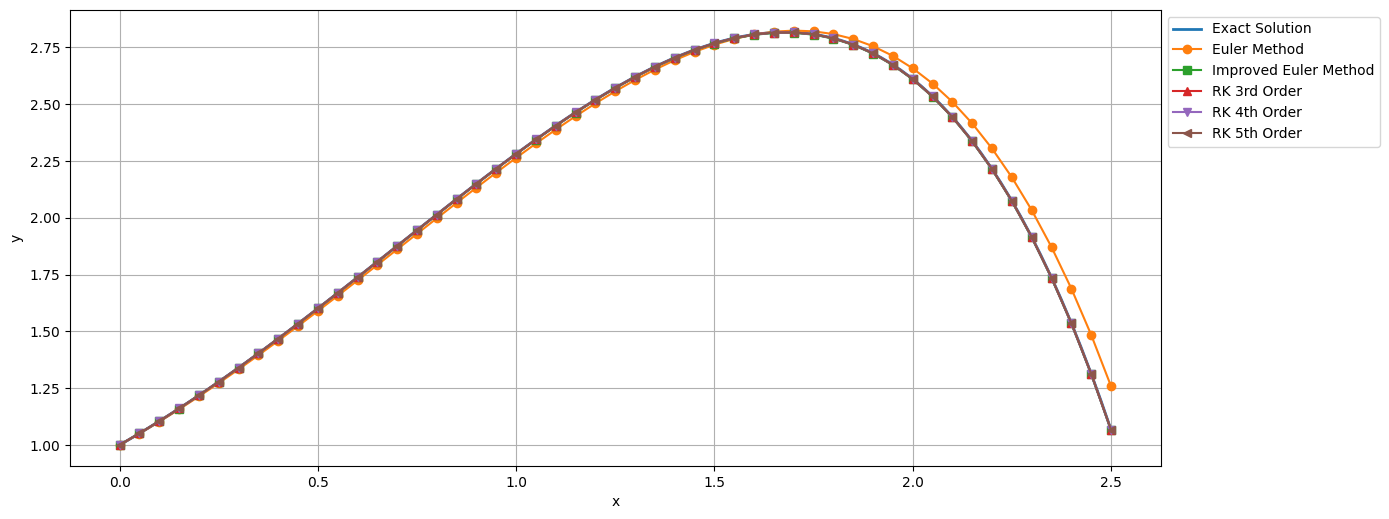

In [9]:
x_euler, y_euler = euler_method(f, x0, y0, h, n)
x_improved, y_improved = improved_euler_method(f, x0, y0, h, n)
x_rk3, y_rk3 = runge_kutta_method(f, x0, y0, h, n, order=3)
x_rk4, y_rk4 = runge_kutta_method(f, x0, y0, h, n, order=4)
x_rk5, y_rk5 = runge_kutta_method(f, x0, y0, h, n, order=5)

x_exact = np.linspace(x0, x0 + n*h, 100)
y_exact = exact_solution(x_exact)

plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
plt.plot(x_exact, y_exact, label='Exact Solution', linewidth=2)
plt.plot(x_euler, y_euler, 'o-', label='Euler Method')
plt.plot(x_improved, y_improved, 's-', label='Improved Euler Method')
plt.plot(x_rk3, y_rk3, '^-', label='RK 3rd Order')
plt.plot(x_rk4, y_rk4, 'v-', label='RK 4th Order')
plt.plot(x_rk5, y_rk5, '<-', label='RK 5th Order')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid()

plt.tight_layout()
plt.show()

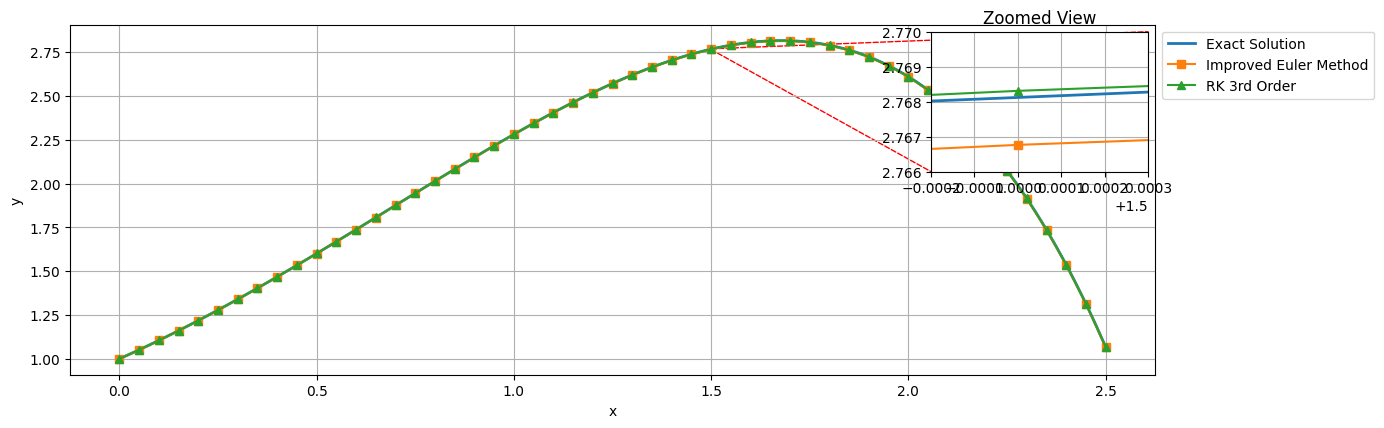

In [10]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import ConnectionPatch

plt.figure(figsize=(14, 10))

ax = plt.subplot(2, 1, 1)
plt.plot(x_exact, y_exact, label='Exact Solution', linewidth=2)
plt.plot(x_improved, y_improved, 's-', label='Improved Euler Method')
plt.plot(x_rk3, y_rk3, '^-', label='RK 3rd Order')
# plt.plot(x_rk4, y_rk4, 'v-', label='RK 4th Order')
# plt.plot(x_rk5, y_rk5, '<-', label='RK 5th Order')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid()

zoom_x_min, zoom_x_max = 1.4998, 1.5003
zoom_y_min, zoom_y_max = 2.766, 2.770
# zoom_x_min, zoom_x_max = 2.4, 2.49
# zoom_y_min, zoom_y_max = 1.3, 1.33

ax.add_patch(plt.Rectangle((zoom_x_min, zoom_y_min), 
                           zoom_x_max - zoom_x_min, 
                           zoom_y_max - zoom_y_min, 
                           edgecolor='red', facecolor='none', linestyle='--'))

ax_inset = inset_axes(ax, width="20%", height="40%", loc='upper right')
ax_inset.plot(x_exact, y_exact, label='Exact Solution', linewidth=2)
ax_inset.plot(x_improved, y_improved, 's-', label='Improved Euler Method')
ax_inset.plot(x_rk3, y_rk3, '^-', label='RK 3rd Order')
# ax_inset.plot(x_rk4, y_rk4, 'v-', label='RK 4th Order')
# ax_inset.plot(x_rk5, y_rk5, '<-', label='RK 5th Order')
ax_inset.set_xlim(zoom_x_min, zoom_x_max)
ax_inset.set_ylim(zoom_y_min, zoom_y_max)
ax_inset.grid()
ax_inset.set_title('Zoomed View')

con = ConnectionPatch(xyA=(zoom_x_min, zoom_y_min), coordsA=ax.transData,
                      xyB=(zoom_x_min, zoom_y_min), coordsB=ax_inset.transData,
                      linestyle="--", color="red")
ax.add_artist(con)

con2 = ConnectionPatch(xyA=(zoom_x_max, zoom_y_max), coordsA=ax.transData,
                       xyB=(zoom_x_max, zoom_y_max), coordsB=ax_inset.transData,
                       linestyle="--", color="red")
ax.add_artist(con2)
# plt.tight_layout()
plt.show()